In [69]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import pickle
from math import sqrt
import random
g_train_data = open("./data/train.pkl","rb")
g_test_data = open("./data/test.pkl","rb")
a_train_data = pickle.load(g_train_data)
a_test_data = pickle.load(g_test_data)
length_train_data = int(len(a_train_data)/10)
bias = []
biassquare = []
variance = []
i_error = []
mse = []
deg_avg_val = []
random.shuffle(a_train_data)
testing = np.array_split(a_train_data,2,axis = 1)
train_data_x = np.array_split(testing[0],10)
train_data_y = np.array_split(testing[1],10)
testing2 = np.array_split(a_test_data,2,axis = 1)
test_data_x = testing2[0]
test_data_y = testing2[1]
triarr = test_data_x.copy()
triarr.sort()
for deg in range(20):
    predictvalue = []
    ggm = 0
    for setind in range(10):
        poly = PolynomialFeatures(degree = deg+1)
        X_poly = poly.fit_transform(train_data_x[setind])
        lin_reg = LinearRegression()
        lin_reg.fit(X_poly,train_data_y[setind])
        predictvalue.append(lin_reg.predict((poly.fit_transform(test_data_x))))
    avgval = []
    for i in range(10):
        ggm = ggm + np.sum(np.square(np.subtract(test_data_y,predictvalue[i])))
    ggm = ggm/800
    mse.append(ggm)
    testing3 = np.array(predictvalue).sum(axis=0)
    testing3 = testing3/10
    avgval = testing3.flatten()
    deg_avg_val.append(avgval)
    testing4 = np.array(predictvalue)
    testing4 = testing4.reshape(10,80)
    for i in range(10):
        testing4[i] = np.square(np.subtract(testing4[i],avgval))
    testing4 = testing4.sum(axis=0)
    testing4 = testing4/10
    gm = testing4.sum()/len(avgval)
    variance.append(gm)
testing5 = test_data_y.flatten()
for deg in range(20):
    sm=np.sum(np.abs(np.subtract(testing5,deg_avg_val[deg])))
    sm = sm/len(test_data_y)
    bias.append(sm)
    sm = np.sum(np.square(np.subtract(testing5,deg_avg_val[deg])))
    sm = sm/len(test_data_y)
    biassquare.append(sm)
degree = []
for deg in range(20):
    i_error.append(mse[deg]-(biassquare[deg])-variance[deg])
    degree.append(deg+1)
testing6 = np.square(np.array(bias))

In [62]:
print("Task 2.2.2")
df = pd.DataFrame(np.column_stack((bias,variance)), columns={'bias','variance'})
df.index = np.arange(1, len(df)+1)
df

Task 2.2.2


,bias,variance
1,827.595964,80964.262650
2,808.983095,96726.321892
3,133.686750,97142.373733
4,139.582034,117754.285440
5,138.312281,138683.008263
6,145.761666,155350.482605
7,150.865189,182107.957081
8,151.307319,227979.722153
9,153.387945,252107.961226
10,168.166625,281925.799065


In [63]:
print("Task 2.3")
df2 = pd.DataFrame(i_error, columns={'Irreducible Error'})
df2.index = np.arange(1, len(df2)+1)
print("In the table below the zeroes(if any) aren't actually zeroes its just because it was a very small number such that it could not be represented therefore rounded off to zero ")
df2

Task 2.3
In the table below the zeroes(if any) aren't actually zeroes its just because it was a very small number such that it could not be represented therefore rounded off to zero 


,Irreducible Error
1,-3.201421e-10
2,-3.055902e-10
3,0.000000e+00
4,4.365575e-11
5,-5.820766e-11
6,-5.820766e-11
7,0.000000e+00
8,2.910383e-11
9,5.820766e-11
10,5.820766e-11


Task 2.4


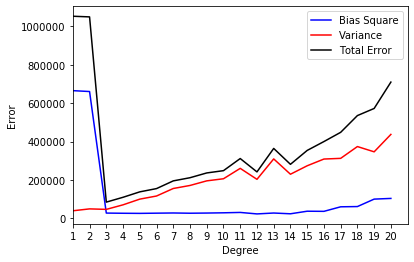

In [70]:
print("Task 2.4")
plt.xlim((1,21))
plt.plot(degree,testing6,color ='blue',label='Bias Square')
plt.plot(degree,variance,color ='red',label = 'Variance')
plt.plot(degree,mse,color ='black',label = 'Total Error')
plt.xlabel("Degree")
plt.ylabel("Error")
plt.xticks(range(1, 21))
plt.legend()
plt.show()